In [1]:
import pandas as pd
import math
import matplotlib as mpl
#mpl.use('pdf')
import matplotlib.pyplot as plt
import matplotlib.font_manager
import numpy as np
from collections import OrderedDict
import matplotlib
import seaborn as sns
#Red
red1= sns.color_palette("Reds_d",1)
red2= sns.color_palette("Reds_d",2)
red3= sns.color_palette("Reds_d",3)
red4= sns.color_palette("Reds_d",4)
red5= sns.color_palette("Reds_d",5)
red6= sns.color_palette("Reds_d",6)
red7= sns.color_palette("Reds_d",7)
red8= sns.color_palette("Reds_d",8)

#YellowGreen
yg1= sns.color_palette("YlGn_d",1)
yg2= sns.color_palette("YlGn_d",2)
yg3= sns.color_palette("YlGn_d",3)
yg4= sns.color_palette("YlGn_d",4)
yg5= sns.color_palette("YlGn_d",5)
yg7= sns.color_palette("YlGn_d",7)

#GreenBlue
gb1= sns.color_palette("GnBu_d",1)
gb2= sns.color_palette("GnBu_d",2)
gb3= sns.color_palette("GnBu_d",3)
gb4= sns.color_palette("GnBu_d",4)
gb5= sns.color_palette("GnBu_d",5)
gb6= sns.color_palette("GnBu_d",6)
gb7= sns.color_palette("GnBu_d",7)
gb8= sns.color_palette("GnBu_d",8)

cp2 = list(map(lambda x: sns.desaturate(x,0.9),[red7[2],gb7[4]]))
cp2v1 = list(map(lambda x: sns.desaturate(x,0.9),[red7[2],yg7[0]]))
cp3 = list(map(lambda x: sns.desaturate(x,0.9),[yg7[0],gb7[4],red7[2]]))
#cp4 = list(map(lambda x: sns.desaturate(x,0.9),red1+gb2+yg1))
cp2_2 = list(map(lambda x: sns.desaturate(x,0.9),[red7[0],red7[3],gb7[4],gb7[6]]))
cp_total_spectrum = list(map(lambda x: sns.desaturate(x,0.9),gb7 + yg7 + red7))

In [2]:
sns.set_palette(cp2)
sns.color_palette()

[(0.8807358708189157, 0.32277047289504046, 0.2744659746251443),
 (0.2649160579264386, 0.5270152505446624, 0.6269460463924131)]

In [3]:
sns.set_palette(cp2v1)
sns.color_palette()

[(0.8807358708189157, 0.32277047289504046, 0.2744659746251443),
 (0.6120315263360248, 0.8081330257593234, 0.5357962322183777)]

In [4]:
sns.set_palette(cp3)
sns.color_palette()

[(0.6120315263360248, 0.8081330257593234, 0.5357962322183777),
 (0.2649160579264386, 0.5270152505446624, 0.6269460463924131),
 (0.8807358708189157, 0.32277047289504046, 0.2744659746251443)]

In [5]:
cpbasic = list(map(lambda x: sns.desaturate(x,0.9),['g','r','b','orange','grey']))
sns.set_palette(cpbasic)
sns.color_palette()

[(0.025000000000000022, 0.475, 0.025000000000000022),
 (0.95, 0.050000000000000044, 0.050000000000000044),
 (0.050000000000000044, 0.050000000000000044, 0.95),
 (0.95, 0.6323529411764707, 0.050000000000000044),
 (0.5019607843137255, 0.5019607843137255, 0.5019607843137255)]

In [6]:
font=8
plt.rc('font', family='serif', serif='Times')
#plt.rc('text', usetex=True)
plt.rc('xtick', labelsize=font-1)
plt.rc('ytick', labelsize=font-1)
plt.rc('axes', labelsize=font)
plt.rcParams.update({'axes.titlesize': font+2})


# width as measured in inkscape
width = 3.487
height = width / 1.618*3/2

#fig, axs = plt.subplots()
#fig.subplots_adjust(left=.15, bottom=.16, right=.99, top=.97)

#import seaborn as sns
#sns.set(style="whitegrid", palette=cpbasic,font_scale=0.2, rc={"lines.linewidth": 1})
def harry_plotter_scatter(plot_df, plot_x_axis_list, plot_y_axis_list, select_str, plot_id, 
                      rotation = 30, adj_left = .1, adj_bottom = .2, adj_right = .99, adj_top = .88, no_sort=False, hue_hue = 'None'):
    for plot_x_itter in plot_x_axis_list:
        if no_sort:
            plot_df_sorted = plot_df
        else:
            dataTypeX = plot_df[plot_x_itter].dtype
            if dataTypeX == np.float64 or dataTypeX == np.int64 or dataTypeX == float or dataTypeX == int:
                plot_df_sorted = plot_df.sort_values(plot_x_itter)
            elif plot_x_itter == 'mem_range':
                plot_df_sorted = plot_df.sort_values('A_mem_footprint')
            else:
                print("Warning: X not sorted: dtype = %s" % (dataTypeX))
                plot_df_sorted = plot_df
        for plot_y_itter in plot_y_axis_list:
            fig, axs = plt.subplots()
            if hue_hue == 'None':
                sns_plot = sns.scatterplot(data=plot_df_sorted, x=plot_x_itter, y=plot_y_itter, ax=axs)
            else:
                sns_plot = sns.scatterplot(data=plot_df_sorted, x=plot_x_itter, y=plot_y_itter, hue = hue_hue, ax=axs)
            axs.set_title('Select: %s' %(select_str))
            fig.subplots_adjust(left=adj_left, bottom=adj_bottom, right=adj_right, top=adj_top)
            plt.xticks(rotation=rotation)
            select_str_id = select_str.replace('=', 'eq').replace('<', 'l').replace('>', 'g').replace(', ', '_').replace(',', '_').replace('\n', '_').replace(' ', '-')
            fig.savefig('./Plot_tries/%s_Select-%s_x-%s_y-%s.pdf' % (plot_id, select_str_id, plot_x_itter, plot_y_itter))
            plt.close()
            
def harry_plotter_box(plot_df, plot_x_axis_list, plot_y_axis_list, select_str, plot_id, 
                      rotation = 30, adj_left = .1, adj_bottom = .2, adj_right = .99, adj_top = .88, no_sort=False, hue_hue = 'None'):
    for plot_x_itter in plot_x_axis_list:
        if no_sort:
            plot_df_sorted = plot_df
        else:
            dataTypeX = plot_df[plot_x_itter].dtype
            if dataTypeX == np.float64 or dataTypeX == np.int64 or dataTypeX == float or dataTypeX == int:
                plot_df_sorted = plot_df.sort_values(plot_x_itter)
            elif plot_x_itter == 'mem_range':
                plot_df_sorted = plot_df.sort_values('A_mem_footprint')
            else:
                print("Warning: X not sorted: dtype = %s" % (dataTypeX))
                plot_df_sorted = plot_df
        for plot_y_itter in plot_y_axis_list:
            fig, axs = plt.subplots()
            if hue_hue == 'None':
                sns_plot = sns.boxplot(data=plot_df_sorted, x=plot_x_itter, y=plot_y_itter, ax=axs)
            else:
                sns_plot = sns.boxplot(data=plot_df_sorted, x=plot_x_itter, y=plot_y_itter, hue = hue_hue, ax=axs)
            axs.set_title('Select: %s' %(select_str))
            fig.subplots_adjust(left=adj_left, bottom=adj_bottom, right=adj_right, top=adj_top)
            plt.xticks(rotation=rotation)
            select_str_id = select_str.replace('=', 'eq').replace('<', 'l').replace('>', 'g').replace(', ', '_').replace(',', '_').replace('\n', '_').replace(' ', '-')
            fig.savefig('./Plot_tries/%s_Select-%s_x-%s_y-%s.pdf' % (plot_id, select_str_id, plot_x_itter, plot_y_itter))
            plt.close()

# Read GPU Data (panastas)

In [7]:
# import string as str
reps = 1
implementations = ['cuSPARSE_csr11', 'cuSPARSE_coo11', 'CSR5_9', 'cuSPARSE_csr9-2', 'cuSPARSE_hyb9-2']
#['OMP_csr-40', 'cuSPARSE_csr', 'cuSPARSE_hyb', 'cuSPARSE_bsr-2', 'cuSPARSE_bsr-4', 'cuSPARSE_bsr-16', 'cuSPARSE_bsr-64', 'cuCSR5']
dtypes=['D']
for dtype in dtypes:
    #Unified read
    fname = "silver1-TeslaV100_dtype-%s_run_full_dataset.csv" % dtype # "silver1-TeslaV100_dtype-%s_run_dataset.csv" % dtype
    inputdata_GPU = pd.read_csv('../Benchmarks/%s' % fname, names = 
                            ['mtx_name','distribution','placement','diagonal_factor', 'seed','m','n','nz',
                             'density','A_mem_footprint','mem_range','avg_nz_row','std_nz_row','avg_bandwidth',
                            'std_bandwidth','avg_scattering','std_scattering','implementation','time','gflops','W_avg', 'J_estimated'])
    inputdata_GPU['System'] = 'TeslaV100'
   # print(inputdata_GPU.head(2))

# Read CPU Data (dgal)

In [8]:

names = ['mtx_name','distribution','placement','diagonal_factor', 'seed','m','n','nz',
        'density','A_mem_footprint','mem_range','avg_nz_row','std_nz_row','avg_bandwidth',
        'std_bandwidth','avg_scattering','std_scattering','implementation','time','gflops','W_avg', 'J_estimated']


fname = "hawk_csr_naive_normal_4-2048_t64_d.out" 
inputdata_csrnaive_64 = pd.read_csv('../Benchmarks/%s' % fname, names=names)
inputdata_csrnaive_64['System'] = 'HawkAmdRome'
inputdata_csrnaive_64['implementation'] = 'Naive_CSR_CPU_64'

fname = "hawk_csr_naive_normal_4-2048_t128_d.out" 
inputdata_csrnaive_128 = pd.read_csv('../Benchmarks/%s' % fname, names=names)
inputdata_csrnaive_128['System'] = 'HawkAmdRome'
inputdata_csrnaive_128['implementation'] = 'Naive_CSR_CPU_128'


fname = "hawk_csr5_normal_4-2048_t64_d.out"
inputdata_csr5cpu_64 = pd.read_csv('../Benchmarks/%s' % fname, names=names)
inputdata_csr5cpu_64['System'] = 'HawkAmdRome'
inputdata_csr5cpu_64['implementation'] = 'CSR5_CPU_64'

fname = "hawk_csr5_normal_4-2048_t128_d.out"
inputdata_csr5cpu_128 = pd.read_csv('../Benchmarks/%s' % fname, names=names)
inputdata_csr5cpu_128['System'] = 'HawkAmdRome'
inputdata_csr5cpu_128['implementation'] = 'CSR5_CPU_128'


fname = "hawk_mkl_ie_normal_4-2048_t64_d.out"
inputdata_mkl_64 = pd.read_csv('../Benchmarks/%s' % fname, names=names)
inputdata_mkl_64['System'] = 'HawkAmdRome'
inputdata_mkl_64['implementation'] = 'MKL_IE_64'

fname = "hawk_mkl_ie_normal_4-2048_t128_d.out"
inputdata_mkl_128 = pd.read_csv('../Benchmarks/%s' % fname, names=names)
inputdata_mkl_128['System'] = 'HawkAmdRome'
inputdata_mkl_128['implementation'] = 'MKL_IE_128'


fname = "hawk_mkl_ie_optimize_normal_4-2048_t64_d.out"
inputdata_mkl_optimize_64 = pd.read_csv('../Benchmarks/%s' % fname, names=names)
inputdata_mkl_optimize_64['System'] = 'HawkAmdRome'
inputdata_mkl_optimize_64['implementation'] = 'MKL_IE_Optimize_64'

fname = "hawk_mkl_ie_optimize_normal_4-2048_t128_d.out"
inputdata_mkl_optimize_128 = pd.read_csv('../Benchmarks/%s' % fname, names=names)
inputdata_mkl_optimize_128['System'] = 'HawkAmdRome'
inputdata_mkl_optimize_128['implementation'] = 'MKL_IE_Optimize_128'


inputdata_CPU = pd.concat([
    inputdata_csrnaive_64, inputdata_csrnaive_128,
    inputdata_csr5cpu_64, inputdata_csr5cpu_128,
    inputdata_mkl_64, inputdata_mkl_128,
    inputdata_mkl_optimize_64, inputdata_mkl_optimize_128
    ])


# Read FPGA Data (pmpakos)

In [9]:
    fname = "xilinx_spmv_4-2048_normal_dataset_dtype-%s.csv" % dtype
    inputdata_FPGA = pd.read_csv('../Benchmarks/%s' % fname, names = 
                    ['mtx_name','distribution','placement','diagonal_factor', 'seed','m','n','nz',
                     'density','A_mem_footprint','mem_range','avg_nz_row','std_nz_row','avg_bandwidth',
                    'std_bandwidth','avg_scattering','std_scattering','implementation','time','gflops','W_avg', 'J_estimated'])
    inputdata_FPGA['System'] = 'FPGA'
    #print(inputdata_FPGA.head(2))

# Fix problem with scattering (being calculated before dividing with nr_cols) 

# <font color='red'>FIXME</font> 
(Don't know if this issue occurs any more with dgal generator)


In [10]:
    # MPAKOS fix columns div
    #inputdata_GPU['avg_scattering'] = inputdata_GPU['avg_scattering']/inputdata_GPU['n']
    #inputdata_GPU['std_scattering'] = inputdata_GPU['std_scattering']/inputdata_GPU['n']
    

# Concatenate all data, place in *inputdata* dataframe

In [11]:
    # Merge the results
    inputdata = pd.concat([inputdata_GPU,inputdata_CPU])
    inputdata = pd.concat([inputdata,inputdata_FPGA])

In [12]:
    # Group per reps, take mean
    groupreps = inputdata.groupby(['mtx_name','distribution','placement','diagonal_factor', 'seed','m','n', 
                             'density','A_mem_footprint','mem_range','nz','avg_nz_row','std_nz_row','avg_bandwidth',
                            'std_bandwidth','avg_scattering','std_scattering', 'implementation','System']).mean().reset_index()
    #dataTypeSeries = groupreps.dtypes
    #print('Data type of each column of Dataframe :')
    #print(dataTypeSeries)

---
# Initiate plotting phase

In [13]:
    plot_x_axis = ['mem_range']
    plot_y_axis = ['gflops']
    plot_id = 'Test'
    select_criterion = (groupreps['avg_nz_row'] > 19) & ( groupreps['std_nz_row'] > 1 ) & ( groupreps['std_nz_row'] < 8.03) & ( groupreps['implementation'] == 'Xilinx_SpMV') # & (groupreps['nz'] > 100000)
    select_str = 'avg_nz_row > 19, std_nz_row > 1 , std_nz_row < 8.03\nImplementation = Xilinx_SpMV'
    groupreps_select = groupreps[select_criterion]
    #groupbench = groupreps_select.groupby(['mtx_name','distribution','placement','diagonal_factor', 'seed','m','n', 'density','A_mem_footprint','mem_range','nz','avg_nz_row','std_nz_row','avg_bandwidth', 'std_bandwidth','avg_scattering','std_scattering'], as_index =False)

    #plot_x_axis = [] # remove this line, if you want to plot Xilinx_SpMV results
    harry_plotter_box(groupreps_select, plot_x_axis, plot_y_axis, select_str, plot_id)
    #harry_plotter_scatter(groupreps_select, plot_x_axis, plot_y_axis, select_str, plot_id)


findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'serif' not found because none of the following families were found: Times


In [14]:
    # Group per system, take best
    group_system = inputdata.groupby(['mtx_name','distribution','placement','diagonal_factor', 'seed','m','n', 
                             'density','A_mem_footprint','mem_range','nz','avg_nz_row','std_nz_row','avg_bandwidth',
                            'std_bandwidth','avg_scattering','std_scattering', 'System'], as_index = False)
    reslist = []
    for desc, experiment in group_system:
        best_format = experiment['implementation'].iloc[experiment['gflops'].argmax()]
        outrow = experiment[experiment['implementation'] == best_format]
        reslist.append(outrow.values.tolist()[0])
        #print(outrow.values.tolist()[0])
    group_system_best = pd.DataFrame(reslist, columns =['mtx_name','distribution','placement','diagonal_factor', 'seed','m','n','nz',
                     'density','A_mem_footprint','mem_range','avg_nz_row','std_nz_row','avg_bandwidth',
                    'std_bandwidth','avg_scattering','std_scattering','implementation','time','gflops','W_avg', 'J_estimated', 'System'])
    

---
# Q1 GPU

In [15]:
    # Q1 : Impact of memory footprint, all other features are “good”
    # device = GPU
    # average nnz/row > 20
    # Stdev nnz/row in  [1, 8.03]
    # Bandwidth = “~nnz/row” (κατά προτίμηση μαζεμένα γύρω από τη διαγώνιο τα nnz)
    # X axis : memory footprint ranges (boxplot)

    plot_x_axis = ['mem_range']
    plot_y_axis = ['gflops']
    plot_id = 'Q1-GPU'
    select_criterion = ( group_system_best['std_nz_row'] > 1 ) \
    & ( group_system_best['avg_nz_row'] > 19) \
    & ( group_system_best['std_nz_row'] < 8.03) \
    & ((group_system_best['diagonal_factor'] == 0.5) | (group_system_best['diagonal_factor'] == 0.05)) \
    & ( group_system_best['System'] == 'TeslaV100')  # & (groupreps['nz'] > 100000)
    
    select_str = 'avg_nz_row > 19, std_nz_row > 1, std_nz_row < 8.03\ndf = 0.5,0.05, Best of System = TeslaV100'
    
    groupreps_select_best = group_system_best[select_criterion]

    harry_plotter_box(groupreps_select_best, plot_x_axis, plot_y_axis, select_str, plot_id)

---
# Q1 GPU extra

In [16]:
    # Q1 : Impact of memory footprint, all other features are “good”
    # device = GPU
    # average nnz/row > 20
    # Stdev nnz/row in  [1, 8.03]
    # Bandwidth = “~nnz/row” (κατά προτίμηση μαζεμένα γύρω από τη διαγώνιο τα nnz)
    # X axis : avg_nz_row

    plot_x_axis = ['avg_nz_row']
    plot_y_axis = ['gflops']
    plot_id = 'Q1-GPU-extra'
    select_criterion = ( group_system_best['std_nz_row'] > 1 ) \
    & ( group_system_best['avg_nz_row'] > 19) \
    & ( group_system_best['std_nz_row'] < 8.03) \
    & ((group_system_best['diagonal_factor'] == 0.5) | (group_system_best['diagonal_factor'] == 0.05)) \
    & ( group_system_best['System'] == 'TeslaV100')  # & (groupreps['nz'] > 100000)
    
    select_str = 'avg_nz_row > 19, std_nz_row > 1, std_nz_row < 8.03\ndf = 0.5,0.05, Best of System = TeslaV100'
    
    groupreps_select_best = group_system_best[select_criterion]
    groupreps_select_best = groupreps_select_best.round({"avg_nz_row":1})
    
    harry_plotter_box(groupreps_select_best, plot_x_axis, plot_y_axis, select_str, plot_id, rotation = 60)


---
# Q1 CPU

In [17]:
    # Q1 : Impact of memory footprint, all other features are “good”
    # device = CPU
    # average nnz/row > 20
    # Stdev nnz/row in  [1, 8.03]
    # Bandwidth = “~nnz/row” (κατά προτίμηση μαζεμένα γύρω από τη διαγώνιο τα nnz)
    # X axis : memory footprint ranges (boxplot)
    
    plot_x_axis = ['mem_range']
    plot_y_axis = ['gflops']
    plot_id = 'Q1-CPU'
    select_criterion = ( group_system_best['std_nz_row'] > 1 ) \
    & ( group_system_best['avg_nz_row'] > 19) \
    & ( group_system_best['std_nz_row'] < 8.03) \
    & ((group_system_best['diagonal_factor'] == 0.5) | (group_system_best['diagonal_factor'] == 0.05)) \
    & ( group_system_best['System'] == 'HawkAmdRome')  # & (groupreps['nz'] > 100000)
    
    select_str = 'avg_nz_row > 19, std_nz_row > 1, std_nz_row < 8.03\ndf = 0.5,0.05, Best of System = HawkAmdRome'
    
    groupreps_select_best = group_system_best[select_criterion]
    
    harry_plotter_box(groupreps_select_best, plot_x_axis, plot_y_axis, select_str, plot_id)


# Q1 CPU+GPU

In [18]:
    # Q1 CPU & GPU : Plot best per system in the same boxplot
    if True:
        plot_x_axis = ['mem_range']
        plot_y_axis = ['gflops']
        plot_id = 'Q1-CPU-plus-GPU'
        select_criterion = ( group_system_best['std_nz_row'] > 1 ) \
        & ( group_system_best['avg_nz_row'] > 19) \
        & ( group_system_best['std_nz_row'] < 8.03) \
        & ((group_system_best['diagonal_factor'] == 0.5) | (group_system_best['diagonal_factor'] == 0.05)) \
        & ( group_system_best['System'] != 'FPGA') # & (groupreps['nz'] > 100000)
        
        select_str = 'avg_nz_row > 19, std_nz_row > 1, std_nz_row < 8.03\ndf = 0.5,0.05, Best per System'
        
        groupreps_select_best = group_system_best[select_criterion]

        harry_plotter_box(groupreps_select_best, plot_x_axis, plot_y_axis, select_str, plot_id, hue_hue = 'System')
    

# Q1 CPU extra

In [19]:
    # break down Q2 memory range [256-512], due to its high variance of performance.
    # plot with x axis avg_nz_row, std_nz_row, m, A_mem_footprint    
    plot_x_axis = ['avg_nz_row', 'std_nz_row', 'm', 'A_mem_footprint']
    plot_y_axis = ['gflops']
    plot_id = 'Q1-CPU-extra'
    select_criterion = ( group_system_best['std_nz_row'] > 1 ) \
    & ( group_system_best['avg_nz_row'] > 19) \
    & ((group_system_best['mem_range'] == "[256-512]")) \
    & ( group_system_best['std_nz_row'] < 8.03) \
    & ((group_system_best['diagonal_factor'] == 0.5) | (group_system_best['diagonal_factor'] == 0.05)) \
    & ( group_system_best['System'] == 'HawkAmdRome')  # & (groupreps['nz'] > 100000)
    
    select_str = 'mem_range = [256-512], avg_nz_row > 19, std_nz_row > 1\nstd_nz_row < 8.03, df = 0.5,0.05, Best of System = HawkAmdRome'
    
    groupreps_select_best = group_system_best[select_criterion]
    groupreps_select_best = groupreps_select_best.round({"avg_nz_row":1})
    groupreps_select_best = groupreps_select_best.round({"std_nz_row":2})
    groupreps_select_best = groupreps_select_best.round({"A_mem_footprint":0})
    
    harry_plotter_box(groupreps_select_best, plot_x_axis, plot_y_axis, select_str, plot_id)

# Q2 - GPU

In [20]:
    # Q2 : Impact of row size, all other features are “good”
    # device = GPU
    # Mem_range: > 128
    # Stdev nnz/row in  [1, 8.03]
    # Bandwidth = “~nnz/row” (κατά προτίμηση μαζεμένα γύρω από τη διαγώνιο τα nnz)
    # X axis : nnz per row
    
    plot_x_axis = ['avg_nz_row']
    plot_y_axis = ['gflops']
    plot_id = 'Q2-GPU'
    select_criterion = ( group_system_best['std_nz_row'] > 1 ) \
    & ((group_system_best['mem_range'] == "[128-256]") | (group_system_best['mem_range'] == "[256-512]") | (group_system_best['mem_range'] == "[512-1024]") | (group_system_best['mem_range'] == "[1024-2048]")) \
    & ( group_system_best['std_nz_row'] < 8.03) \
    & ((group_system_best['diagonal_factor'] == 0.5) | (group_system_best['diagonal_factor'] == 0.05)) \
    & ( group_system_best['System'] == 'TeslaV100')  # & (groupreps['nz'] > 100000)
    
    select_str = 'mem_range > 128, std_nz_row > 1, std_nz_row < 8.03\ndf = 0.5,0.05, Best of System = TeslaV100'
    
    groupreps_select_best = group_system_best[select_criterion]
    groupreps_select_best = groupreps_select_best.round({"avg_nz_row":1})
    
    harry_plotter_box(groupreps_select_best, plot_x_axis, plot_y_axis, select_str, plot_id)

# Q2 - CPU

In [21]:
    # Q2 : Impact of row size, all other features are “good”
    # device = CPU
    # 128 < Mem_range < 256
    # Stdev nnz/row in  [1, 8.03]
    # Bandwidth = “~nnz/row” (κατά προτίμηση μαζεμένα γύρω από τη διαγώνιο τα nnz)
    # X axis : nnz per row

    plot_x_axis = ['avg_nz_row']
    plot_y_axis = ['gflops']
    plot_id = 'Q2-CPU'
    select_criterion = ( group_system_best['std_nz_row'] > 1 ) \
    & ( group_system_best['mem_range'] == "[128-256]" ) \
    & ( group_system_best['std_nz_row'] < 8.03) \
    & ((group_system_best['diagonal_factor'] == 0.5) | (group_system_best['diagonal_factor'] == 0.05)) \
    & ( group_system_best['System'] == 'HawkAmdRome') 
    
    select_str = 'mem_range > 128, mem_range < 256, std_nz_row > 1\nstd_nz_row < 8.03, df = 0.5,0.05, Best of System = HawkAmdRome'
    
    select_str_id = select_str.replace('=', 'eq').replace('<', 'l').replace('>', 'g').replace(', ', '_').replace(',', '_').replace('\n', '_').replace(' ', '-')
    groupreps_select_best = group_system_best[select_criterion]
    groupreps_select_best = groupreps_select_best.round({"avg_nz_row":1})
    
    harry_plotter_box(groupreps_select_best, plot_x_axis, plot_y_axis, select_str, plot_id)

# Q3 GPU

In [22]:
    # Q3: Impact of imbalance, all other features are “good”
    # device = GPU
    # Mem_range: > 128
    # average nnz/row > 40
    # Bandwidth = “~nnz/row” (κατά προτίμηση μαζεμένα γύρω από τη διαγώνιο τα nnz)
    # X axis : stdev nnz/row
    plot_x_axis = ['std_nz_row']
    plot_y_axis = ['gflops']
    plot_id = 'Q3-GPU'
    select_criterion = ( group_system_best['A_mem_footprint'] > 127.9 ) \
    & ( group_system_best['avg_nz_row'] > 40) \
    & ((group_system_best['diagonal_factor'] == 0.5) | (group_system_best['diagonal_factor'] == 0.05)) \
    & ( group_system_best['System'] == 'TeslaV100')  # & (groupreps['nz'] > 100000)
    
    select_str = 'A_mem_footprint > 127.9, avg_nz_row > 40\ndf = 0.5,0.05, Best of System = TeslaV100'
    
    groupreps_select_best = group_system_best[select_criterion]
    groupreps_select_best = groupreps_select_best.round({"std_nz_row":0})

    harry_plotter_box(groupreps_select_best, plot_x_axis, plot_y_axis, select_str, plot_id)
    
    # All formats instead of best
    select_criterion = ( groupreps['A_mem_footprint'] > 127.9 ) \
    & ( groupreps['avg_nz_row'] > 40) \
    & ((groupreps['diagonal_factor'] == 0.5) | (groupreps['diagonal_factor'] == 0.05)) \
    & ( groupreps['System'] == 'TeslaV100')  # & (groupreps['nz'] > 100000)
    
    select_str = 'A_mem_footprint > 127.9, avg_nz_row > 40\ndf = 0.5,0.05, System = TeslaV100'
    
    groupreps_select = groupreps[select_criterion]
    groupreps_select = groupreps_select.round({"std_nz_row":0})
    
    harry_plotter_box(groupreps_select, plot_x_axis, plot_y_axis, select_str, plot_id, hue_hue = 'implementation')

In [23]:
    # Q31: Impact of imbalance, all other features are “good”
    # device = GPU
    # Mem_range: > 128
    # average nnz/row > 40
    # Bandwidth = “~nnz/row” (κατά προτίμηση μαζεμένα γύρω από τη διαγώνιο τα nnz)
    # X axis : var_coefficient = std_nz_row / avg_nz_row
    group_system_best['var_coefficient'] = group_system_best['std_nz_row'] / group_system_best['avg_nz_row']
    print(sorted(group_system_best[group_system_best['std_nz_row'] < group_system_best['avg_nz_row']]))
    plot_x_axis = ['var_coefficient']
    plot_y_axis = ['gflops']
    plot_id = 'Q31-GPU-var'
    select_criterion = \
     ( group_system_best['System'] == 'TeslaV100')  # & (groupreps['nz'] > 100000)
    
    select_str = 'Best of System = TeslaV100'
    
    groupreps_select_best = group_system_best[select_criterion]
    #groupreps_select_best = groupreps_select_best.round({"std_nz_row":1})

    harry_plotter_scatter(groupreps_select_best, plot_x_axis, plot_y_axis, select_str, plot_id)

['A_mem_footprint', 'J_estimated', 'System', 'W_avg', 'avg_bandwidth', 'avg_nz_row', 'avg_scattering', 'density', 'diagonal_factor', 'distribution', 'gflops', 'implementation', 'm', 'mem_range', 'mtx_name', 'n', 'nz', 'placement', 'seed', 'std_bandwidth', 'std_nz_row', 'std_scattering', 'time', 'var_coefficient']


# Q3 CPU

In [24]:
    # Q3: Impact of imbalance, all other features are “good”
    # device = CPU
    # 128 < Mem_range < 256
    # average nnz/row > 20
    # Bandwidth = “~nnz/row” (κατά προτίμηση μαζεμένα γύρω από τη διαγώνιο τα nnz)
    # X axis : stdev nnz/row
    plot_x_axis = ['std_nz_row']
    plot_y_axis = ['gflops']
    plot_id = 'Q3-CPU'
    select_criterion = ( group_system_best['A_mem_footprint'] > 127.9 ) \
    & ( group_system_best['A_mem_footprint'] < 257) \
    & ( group_system_best['avg_nz_row'] > 20) \
    & ((group_system_best['diagonal_factor'] == 0.5) | (group_system_best['diagonal_factor'] == 0.05)) \
    & ( group_system_best['System'] == 'HawkAmdRome')  # & (groupreps['nz'] > 100000)
    
    select_str = '127.9 < A_mem_footprint < 257, avg_nz_row > 20\ndf = 0.5,0.05, Best of System = HawkAmdRome'
    
    groupreps_select_best = group_system_best[select_criterion]
    groupreps_select_best = groupreps_select_best.round({"std_nz_row":0})

    harry_plotter_box(groupreps_select_best, plot_x_axis, plot_y_axis, select_str, plot_id)
        
    # All formats instead of best
    select_criterion = ( groupreps['A_mem_footprint'] > 127.9 ) \
    & ( groupreps['A_mem_footprint'] < 257) \
    & ( groupreps['avg_nz_row'] > 20) \
    & ((groupreps['diagonal_factor'] == 0.5) | (groupreps['diagonal_factor'] == 0.05)) \
    & ( groupreps['System'] == 'HawkAmdRome')  # & (groupreps['nz'] > 100000)
    
    select_str = '127.9 < A_mem_footprint < 257, avg_nz_row > 20\ndf = 0.5,0.05, System = HawkAmdRome'
    
    groupreps_select = groupreps[select_criterion]
    groupreps_select = groupreps_select.round({"std_nz_row":0})
    
    harry_plotter_box(groupreps_select, plot_x_axis, plot_y_axis, select_str, plot_id, hue_hue = 'implementation')

# Q4 GPU

In [25]:
    # Q4: Impact of irregularity, all other features are “good”
    # device = GPU
    # Mem_range: > 128
    # average nnz/row > 40
    # Stdev nnz/row in  [1, 8.03]
    # X axis : bandwidth 
    plot_x_axis = ['avg_bandwidth']
    plot_y_axis = ['gflops']
    plot_id = 'Q4-GPU'
    select_criterion = ( group_system_best['A_mem_footprint'] > 127.9 ) \
    & ( group_system_best['avg_nz_row'] > 40) \
    & ( group_system_best['std_nz_row'] >= 1) \
    & ( group_system_best['std_nz_row'] <= 8.03) \
    & ( group_system_best['System'] == 'TeslaV100')  # & (groupreps['nz'] > 100000)
    
    select_str = '127.9 < A_mem_footprint, avg_nz_row > 40\nstd_nz_row > 1, std_nz_row < 8.03, Best of System = TeslaV100'
    
    groupreps_select_best = group_system_best[select_criterion]
    groupreps_select_best = groupreps_select_best.round({"avg_bandwidth":1})
    
    harry_plotter_box(groupreps_select_best, plot_x_axis, plot_y_axis, select_str, plot_id)

# Q4 CPU

In [26]:
    # Q4: Impact of irregularity, all other features are “good”
    # device = CPU
    # Mem_range: > 128,2< 256
    # average nnz/row > 40
    # Stdev nnz/row in  [1, 8.03]
    # X axis : bandwidth 
    plot_x_axis = ['avg_bandwidth']
    plot_y_axis = ['gflops']
    plot_id = 'Q4-CPU'
    select_criterion = ( group_system_best['A_mem_footprint'] > 127.9 ) \
    & ( group_system_best['A_mem_footprint'] < 257) \
    & ( group_system_best['avg_nz_row'] > 20) \
    & ( group_system_best['std_nz_row'] >= 1) \
    & ( group_system_best['std_nz_row'] <= 8.03) \
    & ( group_system_best['System'] == 'HawkAmdRome')  # & (groupreps['nz'] > 100000)
    
    select_str = '127.9 < A_mem_footprint < 257, avg_nz_row > 20\nstd_nz_row > 1, std_nz_row < 8.03, Best of System = HawkAmdRome'
    
    groupreps_select_best = group_system_best[select_criterion]
    groupreps_select_best = groupreps_select_best.round({"avg_bandwidth":1})
    
    harry_plotter_box(groupreps_select_best, plot_x_axis, plot_y_axis, select_str, plot_id)

---
# Validation matrices 
# Read GPU Data (panastas)

In [27]:
def find_class(mem_footprint):
    low_mb_list =   [4,8, 16,32,64, 128,256,512, 1024,2048, 4096] # removed largest mem range (2048-4096)
    high_mb_list =  [8,16,32,64,128,256,512,1024,2048,4096, 8192]
    for i in range(len(low_mb_list)):
        if(mem_footprint>=low_mb_list[i] and mem_footprint<=high_mb_list[i]):
            pos = i
            mem_range = '['+str(low_mb_list[pos])+'-'+str(high_mb_list[pos])+']'
            return mem_range
    return str(-1)

In [28]:
def modify_footprint(v):
    if(v["implementation"]=="CSR5_9"):
        return (v["A_mem_footprint"] - 4*(v["m"]+v["n"]))/(1024*1024.0)
    else:
        return v["A_mem_footprint"]

dtypes=['D']
for dtype in dtypes:
    #Unified read
    fname = "silver1-TeslaV100_dtype-%s_run_validation_matrices_modified.csv" % dtype
    inputvaldata_GPU = pd.read_csv('../Benchmarks/%s' % fname, names = 
                            ['mtx_name','distribution','placement','diagonal_factor', 'seed','m','n','nz',
                             'density','A_mem_footprint','mem_range','avg_nz_row','std_nz_row','avg_bandwidth',
                            'std_bandwidth','avg_scattering','std_scattering','implementation','time','gflops','W_avg', 'J_estimated'])
 
    inputvaldata_GPU["mtx_name"] = inputvaldata_GPU["mtx_name"].apply(lambda x: x.split("/")[-1].split(".")[0])
    inputvaldata_GPU["density"] = inputvaldata_GPU.apply(lambda x: x["nz"]/(x["m"]*x["n"])*100.0, axis=1)
#     inputvaldata_GPU["A_mem_footprint"] = inputvaldata_GPU.apply(lambda x: modify_footprint(x), axis=1)
    inputvaldata_GPU['System'] = 'TeslaV100'
    
    vm_features = pd.read_csv("../Benchmarks/validation_matrices_features.csv")
    mtx_names = list(vm_features["matrix"]) # same as : list(set(inputvaldata_GPU["mtx_name"]))

    for mtx_name in mtx_names:
        inputvaldata_GPU.loc[inputvaldata_GPU["mtx_name"] == mtx_name, "avg_nz_row"] = list(vm_features[vm_features["matrix"]==mtx_name]["nnz-r-avg"])[0]
        inputvaldata_GPU.loc[inputvaldata_GPU["mtx_name"] == mtx_name, "std_nz_row"] = list(vm_features[vm_features["matrix"]==mtx_name]["nnz-r-std"])[0]
        inputvaldata_GPU.loc[inputvaldata_GPU["mtx_name"] == mtx_name, "avg_bandwidth"] = list(vm_features[vm_features["matrix"]==mtx_name]["bw-avg"])[0]
        inputvaldata_GPU.loc[inputvaldata_GPU["mtx_name"] == mtx_name, "std_bandwidth"] = list(vm_features[vm_features["matrix"]==mtx_name]["bw-std"])[0]
        inputvaldata_GPU.loc[inputvaldata_GPU["mtx_name"] == mtx_name, "avg_scattering"] = list(vm_features[vm_features["matrix"]==mtx_name]["sc-avg"])[0]
        inputvaldata_GPU.loc[inputvaldata_GPU["mtx_name"] == mtx_name, "std_scattering"] = list(vm_features[vm_features["matrix"]==mtx_name]["sc-std"])[0]
        mem_footprint = list(inputvaldata_GPU[inputvaldata_GPU["mtx_name"] == mtx_name]["A_mem_footprint"])[0]
        mem_range = find_class(mem_footprint)
        inputvaldata_GPU.loc[inputvaldata_GPU["mtx_name"] == mtx_name, "mem_range"] = mem_range
    fname2 = "silver1-TeslaV100_dtype-%s_run_validation_matrices_modified_features.csv" % dtype
    inputvaldata_GPU.to_csv('../Benchmarks/%s' % fname2, header=False, index=False)
    #rint(inputvaldata_GPU)
    

# Read CPU Data (dgal)

In [29]:
    fname = "hawk_validation_matrices_d.csv"
    hawk_data = pd.read_csv('../Benchmarks/%s' % fname, names = ["Matrix","rows","columns","nnz","mem (MB)","1","2","4","8","16","32","64","128","Implementation"])

    def create_complete_cpu_csv(threads_dataframe):
        vm_features = pd.read_csv("../Benchmarks/validation_matrices_features.csv")
        mtx_names = list(vm_features["matrix"]) # same as : list(set(inputdata_GPU["mtx_name"]))

        inputvaldata_CPU = pd.DataFrame(columns=['mtx_name','distribution','placement','diagonal_factor', 'seed','m','n','nz',
                                              'density','A_mem_footprint','mem_range','avg_nz_row','std_nz_row','avg_bandwidth',
                                              'std_bandwidth','avg_scattering','std_scattering','implementation','time','gflops','W_avg', 'J_estimated'])
        for mtx_name in mtx_names:
            for index, curr in threads_dataframe[threads_dataframe["Matrix"] == mtx_name].iterrows():
                mtx_name = mtx_name
                distribution = "unused"
                placement = "unused"
                diagonal_factor = 0
                seed = 0
                m = curr["rows"]
                n = curr["columns"]
                nz = curr["nnz"]
                density = nz/(m*n)*100.0
                A_mem_footprint = curr["mem (MB)"]
                mem_range = find_class(A_mem_footprint)
                avg_nz_row = list(vm_features[vm_features["matrix"]==mtx_name]["nnz-r-avg"])[0]
                std_nz_row = list(vm_features[vm_features["matrix"]==mtx_name]["nnz-r-std"])[0]
                avg_bandwidth = list(vm_features[vm_features["matrix"]==mtx_name]["bw-avg"])[0]
                std_bandwidth = list(vm_features[vm_features["matrix"]==mtx_name]["bw-std"])[0]
                avg_scattering = list(vm_features[vm_features["matrix"]==mtx_name]["sc-avg"])[0]
                std_scattering = list(vm_features[vm_features["matrix"]==mtx_name]["sc-std"])[0]
                implementation = curr["Implementation"]
                time = curr["time"]
                gflops = curr["gflops"]
                W_avg = 0
                J_estimated = 0
                inputvaldata_CPU = inputvaldata_CPU.append({'mtx_name' : mtx_name, 'distribution' : distribution, 'placement' : placement, 'diagonal_factor' : diagonal_factor, 'seed' : seed, 'm' : m, 'n' : n, 'nz' : nz, 'density' : density, 'A_mem_footprint' : A_mem_footprint, 'mem_range' : mem_range, 'avg_nz_row' : avg_nz_row, 'std_nz_row' : std_nz_row, 'avg_bandwidth' : avg_bandwidth, 'std_bandwidth' : std_bandwidth, 'avg_scattering' : avg_scattering, 'std_scattering' : std_scattering, 'implementation' : implementation, 'time' : time, 'gflops' : gflops, 'W_avg' : W_avg, 'J_estimated' : J_estimated}, ignore_index=True)
        inputvaldata_CPU['System'] = 'HawkAmdRome'
        return inputvaldata_CPU
    
    hawk_data["time64"] = hawk_data.apply(lambda x: (2*x["nnz"]*10**(-9))/x["64"], axis=1)
    hawk_data64  = hawk_data[["Matrix","rows","columns","nnz","mem (MB)","64","time64","Implementation"]]
    hawk_data64 = hawk_data64.rename(columns={"64": "gflops", "time64": "time"})
    hawk_data64 = create_complete_cpu_csv(hawk_data64)
    fname2 = "hawk_validation_matrices_t64_d.csv"
    hawk_data64.to_csv('../Benchmarks/%s' % fname2, header=False, index=False)
    
    hawk_data["time128"] = hawk_data.apply(lambda x: (2*x["nnz"]*10**(-9))/x["128"], axis=1)
    hawk_data128  = hawk_data[["Matrix","rows","columns","nnz","mem (MB)","128","time128","Implementation"]]
    hawk_data128 = hawk_data128.rename(columns={"128": "gflops", "time128": "time"})
    hawk_data128 = create_complete_cpu_csv(hawk_data128)
    fname2 = "hawk_validation_matrices_t128_d.csv"
    hawk_data128.to_csv('../Benchmarks/%s' % fname2, header=False, index=False)
    #print(hawk_data128)

# Read FPGA Data (pmpakos)

---

In [30]:
dtypes=['D']
for dtype in dtypes:
    #Unified read
    fname = "silver1-TeslaV100_dtype-%s_run_validation_matrices_modified_features.csv" % dtype
    inputvaldata_GPU = pd.read_csv('../Benchmarks/%s' % fname, names = 
                            ['mtx_name','distribution','placement','diagonal_factor', 'seed','m','n','nz',
                             'density','A_mem_footprint','mem_range','avg_nz_row','std_nz_row','avg_bandwidth',
                            'std_bandwidth','avg_scattering','std_scattering','implementation','time','gflops','W_avg', 'J_estimated',"System"],index_col=False)

In [31]:
    fname = "hawk_validation_matrices_t64_d.csv"
    inputvaldata_CPU64 = pd.read_csv('../Benchmarks/%s' % fname, names =
                        ['mtx_name','distribution','placement','diagonal_factor', 'seed','m','n','nz',
                         'density','A_mem_footprint','mem_range','avg_nz_row','std_nz_row','avg_bandwidth',
                        'std_bandwidth','avg_scattering','std_scattering','implementation','time','gflops','W_avg', 'J_estimated','System'],index_col=False)

In [32]:
    fname = "hawk_validation_matrices_t128_d.csv"
    inputvaldata_CPU128 = pd.read_csv('../Benchmarks/%s' % fname, names =
                        ['mtx_name','distribution','placement','diagonal_factor', 'seed','m','n','nz',
                         'density','A_mem_footprint','mem_range','avg_nz_row','std_nz_row','avg_bandwidth',
                        'std_bandwidth','avg_scattering','std_scattering','implementation','time','gflops','W_avg', 'J_estimated','System'],index_col=False)

In [33]:
    # Merge the results
    inputdata64 = pd.concat([inputvaldata_GPU,inputvaldata_CPU64]) # Group per reps, take mean

    groupreps64 = inputdata64.groupby(['mtx_name','distribution','placement','diagonal_factor', 'seed','m','n', 
                             'density','A_mem_footprint','mem_range','nz','avg_nz_row','std_nz_row','avg_bandwidth',
                            'std_bandwidth','avg_scattering','std_scattering', 'implementation','System']).mean().reset_index()

In [34]:
    # Merge the results
    inputvaldata = pd.concat([inputvaldata_GPU,inputvaldata_CPU128]) # Group per reps, take mean

    groupvalreps = inputvaldata.groupby(['mtx_name','distribution','placement','diagonal_factor', 'seed','m','n','nz',
                             'density','A_mem_footprint','mem_range','avg_nz_row','std_nz_row','avg_bandwidth',
                            'std_bandwidth','avg_scattering','std_scattering', 'implementation','System']).mean().reset_index()
    #print(groupvalreps)

In [35]:
    # Group per system, take best
    groupval_system = groupvalreps.groupby(['mtx_name','distribution','placement','diagonal_factor', 'seed','m','n','nz',
                             'density','A_mem_footprint','mem_range','avg_nz_row','std_nz_row','avg_bandwidth',
                            'std_bandwidth','avg_scattering','std_scattering', 'System'], as_index = False)
    reslist = []
    for desc, experiment in groupval_system:
        best_format = experiment['implementation'].iloc[experiment['gflops'].argmax()]
        outrow = experiment[experiment['implementation'] == best_format]
        #print(outrow)
        reslist.append(outrow.values.tolist()[0])
#         print(outrow.values.tolist()[0])
    group_val_system_best = pd.DataFrame(reslist, columns =['mtx_name','distribution','placement','diagonal_factor', 'seed','m','n','nz',
                     'density','A_mem_footprint','mem_range','avg_nz_row','std_nz_row','avg_bandwidth',
                    'std_bandwidth','avg_scattering','std_scattering','implementation', 'System','time','gflops','W_avg', 'J_estimated'])
    #print(group_val_system_best)
    

# some indicative plots

In [36]:
    # Plot TeslaV100 only
    
    plot_x_axis = 'mtx_name'
    plot_y_axis = 'gflops'
    plot_id = 'Validation-GPU'
    
    select_criterion = ( group_val_system_best['System'] == 'TeslaV100') # & (groupreps['nz'] > 100000)

    select_str = 'Validation TeslaV100, 0.8v_nz < synth_nz < 1.2v_nz\n0.8v_m < synth_m < 1.2v_m'

    groupvalreps_select_best = group_val_system_best[select_criterion]

    groupvalreps_select_sorted = groupvalreps_select_best.sort_values('gflops')
    #print(groupvalreps_select_sorted)
    
    fig, axs = plt.subplots()
    fig.subplots_adjust(left=.1, bottom=.32, right=.99, top=.88)

    plt.xticks(rotation=90)
    
    group_system_best_part = group_system_best[group_system_best['System'] == 'TeslaV100']
    
    df_empty = True    
    for index, row in groupvalreps_select_sorted.iterrows():
        #print(row)
        pd.options.mode.chained_assignment = None  # default='warn'
        similar_synthetic = group_system_best_part[True \
                                                  & (group_system_best_part['nz'] < row['nz']*1.2) \
                                                  & (group_system_best_part['nz'] > row['nz']*0.8) \
                                                  & (group_system_best_part['m'] < row['m']*1.2) \
                                                  & (group_system_best_part['m'] > row['m']*0.8) \
                                                  #& (group_system_best_part['std_nz_row'] < row['std_nz_row']*5) \ 
                                                  #& (group_system_best_part['std_nz_row'] > row['std_nz_row']*0.2) \
                                                  #& (group_system_best_part['avg_bandwidth'] < row['avg_bandwidth']*2) \
                                                  #& (group_system_best_part['avg_bandwidth'] > row['avg_bandwidth']*0.5) \
                                                  #& (group_system_best_part['std_bandwidth'] < row['std_bandwidth']*1.2) \
                                                  #& (group_system_best_part['std_bandwidth'] > row['std_bandwidth']*0.8) \
                                                  #& (group_system_best_part['avg_scattering'] < row['avg_scattering']*1.2) \
                                                  #& (group_system_best_part['avg_scattering'] > row['avg_scattering']*0.8) \
                                                  #& (group_system_best_part['std_scattering'] < row['std_scattering']*1.2) \
                                                  #& (group_system_best_part['std_scattering'] > row['std_scattering']*0.8) \
                                                 ]
        similar_synthetic['mtx_name'] = row['mtx_name']
        if similar_synthetic.empty:
            #print(row['mtx_name'])
            similar_synthetic = pd.DataFrame([[row['mtx_name'],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]], columns = group_system_best_part.columns)
        if df_empty:
            synthetic_neighbors = similar_synthetic
            df_empty = False
        else:
            synthetic_neighbors = pd.concat([synthetic_neighbors, similar_synthetic])

    sns_plot = sns.boxplot(data=synthetic_neighbors, x='mtx_name', y=plot_y_axis, ax=axs)
    sns_plot = sns.scatterplot(data=groupvalreps_select_sorted, x=plot_x_axis, y=plot_y_axis, ax=axs)
    
    axs.set_title('Dataset %s' %(select_str))
    select_str_id = select_str.replace('=', 'eq').replace('<', 'l').replace('>', 'g').replace(', ', '_').replace(',', '_').replace('\n', '_').replace(' ', '-')
    fig.savefig('./Plot_tries/%s_Select-%s_x-%s_y-%s.pdf' % (plot_id, select_str_id, plot_x_axis, plot_y_axis))
    plt.close()

In [37]:
    # Plot HawkAmdRome only
    
    plot_x_axis = 'mtx_name'
    plot_y_axis = 'gflops'
    plot_id = 'Validation-CPU'
    
    select_criterion = ( group_val_system_best['System'] == 'HawkAmdRome') # & (groupreps['nz'] > 100000)

    select_str = 'Validation HawkAmdRome, 0.8v_nz < synth_nz < 1.2v_nz\n0.8v_m < synth_m < 1.2v_m'

    groupvalreps_select_best = group_val_system_best[select_criterion]

    groupvalreps_select_sorted = groupvalreps_select_best.sort_values('gflops')
    #print(groupvalreps_select_sorted)
    
    fig, axs = plt.subplots()
    fig.subplots_adjust(left=.1, bottom=.32, right=.99, top=.88)

    plt.xticks(rotation=90)
    
    group_system_best_part = group_system_best[group_system_best['System'] == 'HawkAmdRome']
    
    df_empty = True    
    for index, row in groupvalreps_select_sorted.iterrows():
        #print(row)
        pd.options.mode.chained_assignment = None  # default='warn'
        similar_synthetic = group_system_best_part[True \
                                                  & (group_system_best_part['nz'] < row['nz']*1.2) \
                                                  & (group_system_best_part['nz'] > row['nz']*0.8) \
                                                  & (group_system_best_part['m'] < row['m']*1.2) \
                                                  & (group_system_best_part['m'] > row['m']*0.8) \
                                                  #& (group_system_best_part['std_nz_row'] < row['std_nz_row']*5) \ 
                                                  #& (group_system_best_part['std_nz_row'] > row['std_nz_row']*0.2) \
                                                  #& (group_system_best_part['avg_bandwidth'] < row['avg_bandwidth']*2) \
                                                  #& (group_system_best_part['avg_bandwidth'] > row['avg_bandwidth']*0.5) \
                                                  #& (group_system_best_part['std_bandwidth'] < row['std_bandwidth']*1.2) \
                                                  #& (group_system_best_part['std_bandwidth'] > row['std_bandwidth']*0.8) \
                                                  #& (group_system_best_part['avg_scattering'] < row['avg_scattering']*1.2) \
                                                  #& (group_system_best_part['avg_scattering'] > row['avg_scattering']*0.8) \
                                                  #& (group_system_best_part['std_scattering'] < row['std_scattering']*1.2) \
                                                  #& (group_system_best_part['std_scattering'] > row['std_scattering']*0.8) \
                                                 ]
        similar_synthetic['mtx_name'] = row['mtx_name']
        if similar_synthetic.empty:
            #print(row['mtx_name'])
            similar_synthetic = pd.DataFrame([[row['mtx_name'],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]], columns = group_system_best_part.columns)
        if df_empty:
            synthetic_neighbors = similar_synthetic
            df_empty = False
        else:
            synthetic_neighbors = pd.concat([synthetic_neighbors, similar_synthetic])

    sns_plot = sns.boxplot(data=synthetic_neighbors, x='mtx_name', y=plot_y_axis, ax=axs)
    sns_plot = sns.scatterplot(data=groupvalreps_select_sorted, x=plot_x_axis, y=plot_y_axis, ax=axs)
    
    axs.set_title('Dataset %s' %(select_str))
    select_str_id = select_str.replace('=', 'eq').replace('<', 'l').replace('>', 'g').replace(', ', '_').replace(',', '_').replace('\n', '_').replace(' ', '-')
    fig.savefig('./Plot_tries/%s_Select-%s_x-%s_y-%s.pdf' % (plot_id, select_str_id, plot_x_axis, plot_y_axis))
    plt.close()

In [38]:
    # Plot best per system in the same boxplot
    select_criterion = ( group_val_system_best['System'] != 'FPGA') # & (groupreps['nz'] > 100000)

    select_str = 'Validation matrices, Best per System'

    select_str_id = select_str.replace('=', 'eq').replace('<', 'l').replace('>', 'g').replace(', ', '_').replace(',', '_').replace('\n', '_').replace(' ', '-')
    groupvalreps_select_best = group_val_system_best[select_criterion]

    groupvalreps_select_best = groupreps_select_best.round({"avg_bandwidth":1})
    groupvalreps_select_best = groupreps_select_best.round({"avg_nz_row":-1})
    groupvalreps_select_best = groupreps_select_best.round({"std_nz_row":-1})

    x_axis_list = ["mem_range", "avg_bandwidth", "avg_nz_row", "std_nz_row", ]

    for x_axis in x_axis_list:
        #groupreps_select_sorted = groupreps_select.assign(sorter_col = groupreps_select['mem_range'].split('-').split('[')[1]).sort_values('sorter_col').drop('sorter_col', axis=1)
        groupvalreps_select_sorted = groupvalreps_select_best.sort_values('A_mem_footprint')
        fig, axs = plt.subplots()
        sns_plot = sns.boxplot(data=groupvalreps_select_sorted, x=x_axis, y="gflops", hue = "System", ax=axs)
        axs.set_title('Dataset %s' %(select_str))
        fig.subplots_adjust(left=.1, bottom=.2, right=.99, top=.88)
        plt.xticks(rotation=30)
        fig.savefig('./Plot_tries/validation_matrices_CPU-GPU_Select_%s_plot_per_%s.pdf' % (select_str_id, x_axis) )
        plt.close()

FileNotFoundError: [Errno 2] No such file or directory: './Plot_tries/Validate_plots/Compare_with_dataset_GPU.pdf'

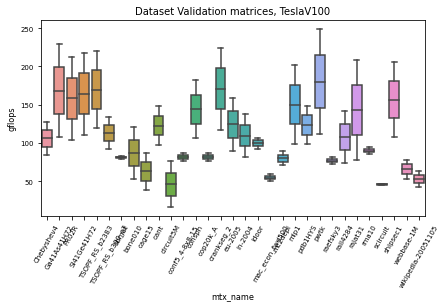

In [39]:
    # GPU validate dataset
    val_select_criterion = ( group_val_system_best['System'] == 'TeslaV100') # & (groupreps['nz'] > 100000)

    select_str = 'Validation matrices, TeslaV100'

    select_str_id = select_str.replace('=', 'eq').replace('<', 'l').replace('>', 'g').replace(', ', '_').replace(',', '_').replace('\n', '_').replace(' ', '-')
    groupvalreps_select_best = group_val_system_best[select_criterion]

    groupvalreps_select_best = groupvalreps_select_best.round({"avg_bandwidth":1})
    groupvalreps_select_best = groupvalreps_select_best.round({"avg_nz_row":-1})
    groupvalreps_select_best = groupvalreps_select_best.round({"std_nz_row":-1})

    x_axis_list = ["mtx_name"]

    for x_axis in x_axis_list:
        #groupreps_select_sorted = groupreps_select.assign(sorter_col = groupreps_select['mem_range'].split('-').split('[')[1]).sort_values('sorter_col').drop('sorter_col', axis=1)
        fig, axs = plt.subplots()
        sns_plot = sns.boxplot(data=groupvalreps_select_best, x=x_axis, y="gflops", ax=axs)
        axs.set_title('Dataset %s' %(select_str))
        fig.subplots_adjust(left=.1, bottom=.2, right=.99, top=.88)
        plt.xticks(rotation=60)
        fig.savefig('./Plot_tries/Validate_plots/Compare_with_dataset_GPU.pdf')
        plt.close()

---